In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc

In [127]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select b.description, c.description from DatixCRM.dbo.code_unit b join DatixCRM.dbo.incidents_main a on a.inc_unit = b.code join DatixCRM.dbo.code_locactual c on a.inc_locactual = c.code where a.inc_type='PAT' and a.inc_category='MEDIC' and a.inc_organisation='QA' and c.cod_parent2='QA'"
df = pd.read_sql(query, sql_conn)
df.head()
df.columns = ['division-care_group','location']
df.head()

,division-care_group,location
0,"Clinical Delivery Division - Critical Care, Th...",Department of Critical Care (E5) (DCCQ)
1,"Clinical Delivery Division - Critical Care, Th...",Department of Critical Care (E5) (DCCQ)
2,"Clinical Delivery Division - Critical Care, Th...",Theatres QA
3,"Clinical Delivery Division - Critical Care, Th...",Department of Critical Care (E5) (DCCQ)
4,"Clinical Delivery Division - Critical Care, Th...",Department of Critical Care (E5) (DCCQ)


In [185]:
divider = df['division-care_group'].str.split(" Division - ",n=1,expand=True)
df['division'] = divider[0]
df['care_group'] = divider[1]
df['division'] = df['division'].str.replace(' and ',' & ')
df.loc[df.division == 'Corporate Functions', 'care_group'] = 'Corporate Functions'
df = df[df['division-care_group'] != 'Corporate Functions']
df = df[df.care_group != 'Pathology']
#df = df[df.care_group != 'Patient Administration Services']
print(df)

                                    division-care_group  \
0     Clinical Delivery Division - Critical Care, Th...   
1     Clinical Delivery Division - Critical Care, Th...   
2     Clinical Delivery Division - Critical Care, Th...   
3     Clinical Delivery Division - Critical Care, Th...   
4     Clinical Delivery Division - Critical Care, Th...   
5     Clinical Delivery Division - Critical Care, Th...   
6     Clinical Delivery Division - Critical Care, Th...   
7     Clinical Delivery Division - Critical Care, Th...   
8     Clinical Delivery Division - Critical Care, Th...   
9     Clinical Delivery Division - Critical Care, Th...   
10    Clinical Delivery Division - Critical Care, Th...   
11    Clinical Delivery Division - Critical Care, Th...   
12    Clinical Delivery Division - Critical Care, Th...   
13    Clinical Delivery Division - Critical Care, Th...   
14    Clinical Delivery Division - Critical Care, Th...   
15    Clinical Delivery Division - Critical Care, Th... 

In [186]:
division_counts = df['division'].value_counts()[df['division'].unique()]
division_percentages = 100*division_counts/sum(division_counts.values)
division_labels = [str(i) for i in division_counts.index]
print(division_labels)

['Clinical Delivery', 'Medicine & Urgent Care', 'Networked Services', 'Surgical & Outpatients']


In [187]:
care_group_counts = df['care_group'].value_counts()[df['care_group'].unique()]
care_group_percentages = 100*care_group_counts/sum(care_group_counts.values)
care_group_labels = care_group_counts.index
print(care_group_percentages)

Critical Care, Theatres, Anaesthetics & HSDU     4.274296
Imaging Radiology                                0.915093
Pharmacy                                        11.664543
Medicine                                        17.757442
Older Persons Medicine                           8.896096
Urgent Care                                     18.950539
Regional Cancer Centre                           7.100660
Renal & Transplantation                          3.532955
Women & Children's                              10.123943
MSK / Head & Neck                                9.394185
Surgery                                          7.390247
Name: care_group, dtype: float64


In [188]:
df['care_group-location'] = df['care_group'] + ' - ' + df['location']
location_counts = df['care_group-location'].value_counts()[df['care_group-location'].unique()]
#print(location_counts)
#location_counts = location_counts.where(location_counts > 10).dropna()
location_percentages = 100*location_counts/sum(location_counts.values)
location_labels = location_counts.index
location_labels_split = location_labels.str.split(" - ",n=1)
location_labels = [el[1] for el in location_labels_split]

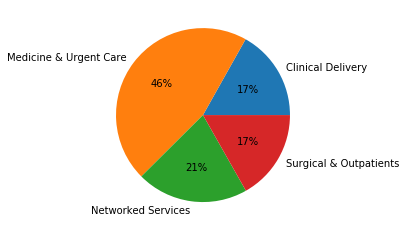

In [189]:
plt.pie(division_counts, labels=division_labels, autopct='%1.0f%%');

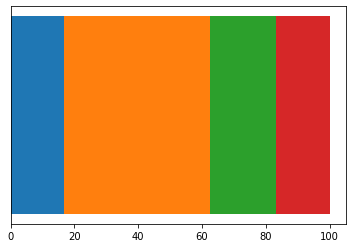

In [190]:
plt.barh(1,division_percentages[0])
plt.barh(1,division_percentages[1],left=division_percentages[0])
plt.barh(1,division_percentages[2],left=division_percentages[0]+division_percentages[1])
plt.barh(1,division_percentages[3],left=division_percentages[0]+division_percentages[1]+division_percentages[2])
fig = plt.gca()
fig.get_yaxis().set_visible(False)

In [191]:
print(df[df.care_group == "Surgery"]['care_group-location'].value_counts()[df['care_group-location'].unique()].dropna())

Surgery - Surgical Assessment Unit (SAU)    190.0
Surgery - D7                                108.0
Surgery - E3                                170.0
Surgery - E2                                115.0
Surgery - Surgical High Care Unit (SHCU)     53.0
Surgery - Colorectal Outpatients QA           2.0
Name: care_group-location, dtype: float64


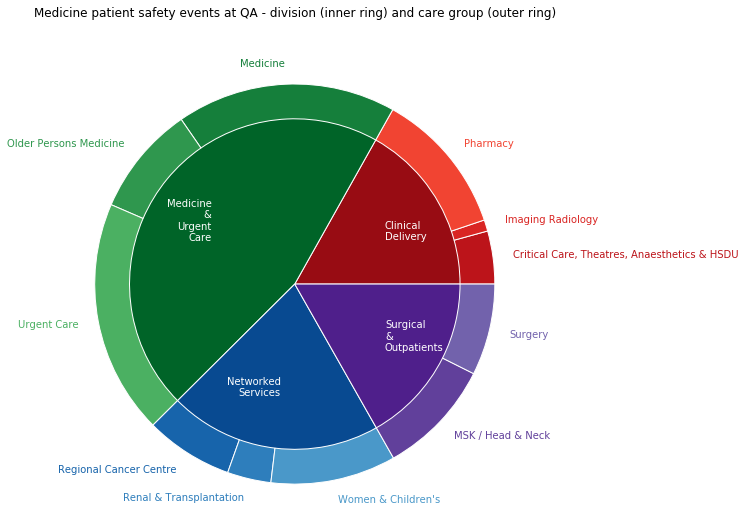

In [194]:
# Create colors
#a, b, c, d, e =[plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]
a, c, d, e = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]

# First Ring (Inside)
fig, ax = plt.subplots()
ax.axis('equal')
division_labels_newlines = [i.replace(' ','\n') for i in division_labels]
#mypie, _ = ax.pie(division_counts, radius=2, labels=division_labels_newlines, labeldistance=0.6, colors=[a(0.9), b(0.9), c(0.9), d(0.9), e(0.9)], textprops={'color':'w'})
mypie, _ = ax.pie(division_counts, radius=2, labels=division_labels_newlines, labeldistance=0.6, colors=[a(0.9), c(0.9), d(0.9), e(0.9)], textprops={'color':'w'})
plt.setp( mypie, width=2, edgecolor='white')
 
# Second Ring (oUTside)
#care_group_colours = [a(0.8), a(0.7), a(0.6), a(0.5), b(0.8), c(0.8), c(0.7), c(0.6), d(0.8), d(0.7), d(0.6), e(0.8), e(0.7), e(0.6)]
care_group_colours = [a(0.8), a(0.7), a(0.6), c(0.8), c(0.7), c(0.6), d(0.8), d(0.7), d(0.6), e(0.8), e(0.7), e(0.6)]
mypie2, texts = ax.pie(care_group_counts, radius=2+0.3, labels=care_group_labels, colors=care_group_colours)
#mypie2, texts = ax.pie(care_group_counts, radius=2+0.3, colors=care_group_colours)
plt.setp( mypie2, width=0.4, edgecolor='white')
for text, color in zip(texts, care_group_colours):
    text.set_color(color)
plt.margins(0,0)

# Third Ring (oUTside)
location_colours = [a(0.49),a(0.48),a(0.47),a(0.46),a(0.45),a(0.44),a(0.43),a(0.39),a(0.38),a(0.29),a(0.19),b(0.49),b(0.48),b(0.47),b(0.46),b(0.45),b(0.44),c(0.495),c(0.49),c(0.485),c(0.48),c(0.475),c(0.47),c(0.465),c(0.46),c(0.455),c(0.45),c(0.445),c(0.44),c(0.435),c(0.43),c(0.425),c(0.42),c(0.415),c(0.39),c(0.38),c(0.37),c(0.36),c(0.35),c(0.34),c(0.33),c(0.32),c(0.31),c(0.29),c(0.28),c(0.27),c(0.26),c(0.25),d(0.49),d(0.48),d(0.47),d(0.46),d(0.45),d(0.44),d(0.43),d(0.42),d(0.41),d(0.39),d(0.38),d(0.37),d(0.36),d(0.35),d(0.34),d(0.33),d(0.32),d(0.31),d(0.29),d(0.285),d(0.28),d(0.275),d(0.27),d(0.265),d(0.26),d(0.255),d(0.25),d(0.245),d(0.24),d(0.235),d(0.23),d(0.225),d(0.22),d(0.215),d(0.21),e(0.49),e(0.485),e(0.48),e(0.475),e(0.47),e(0.465),e(0.46),e(0.455),e(0.45),e(0.445),e(0.44),e(0.435),e(0.43),e(0.425),e(0.39),e(0.38),e(0.37),e(0.36),e(0.35),e(0.34)]
#mypie3, texts = ax.pie(location_counts, radius=2.7, labels=location_labels, colors=location_colours)
#plt.setp( mypie3, width=0.4, edgecolor='white')
#for text, color in zip(texts, location_colours):
#    text.set_color(color)
#plt.margins(0,0)

plt.title('Medicine patient safety events at QA - division (inner ring) and care group (outer ring)', y=1.7);